In [26]:
import random
import simpy
import numpy as np
import matplotlib.pyplot as plt


In [27]:
SEED = 42
average_processing_time = 0.025

response_times =[]
queue_lengths = []
waiting_times = []
throughput = 0
total_request = 0

concurrency = 100
num_cores = 1


In [28]:
def client(env, out_pipe, in_pipe, i):
    global response_times
    
    while True:
        processing_time = random.expovariate(1/average_processing_time)
        arrival_time = env.now
        d = {1: processing_time, 2: i, 3: arrival_time}
        out_pipe.put(d)
        response = yield in_pipe.get(filter=lambda x: True if x[2] == i else False)
        response_time = env.now - arrival_time
        response_times.append(response_time)


def server(env, in_pipe, outpipe):
    global queue_lengths
    global  waiting_times
    global throughput
    global total_request
    while True:
        request = yield in_pipe.get()
        processing_time = request[1]
        arrival_time = request[3]
        waiting_time = env.now - arrival_time
        waiting_times.append(waiting_time)
        queue_length = len(in_pipe.items)
        queue_lengths.append(queue_length)
        yield env.timeout(processing_time)
        total_request = total_request +1
        throughput = total_request / env.now
        outpipe.put(request)


In [29]:
random.seed(SEED)

environment = simpy.Environment()
in_pipe_1=simpy.Store(environment)
a = dict()
a[123] = in_pipe_1

def test(c):
    if c in a.keys():
        return a[c]
    else :
        return False

# in_pipe=simpy.Store(environment)
out_pipe=simpy.FilterStore(environment)

for i in range(concurrency):
    environment.process(client(environment, test(123), out_pipe, i))

for i in range(num_cores):
    environment.process(server(environment,test(123), out_pipe))


In [30]:
environment.run(1000)

response_times=[x*1000 for x in response_times]
waiting_times=[x*1000 for x in waiting_times]

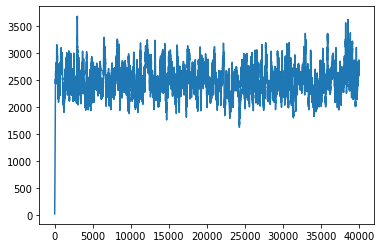

In [31]:
plt.plot(response_times)

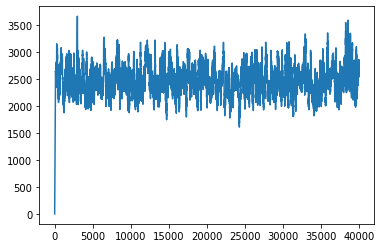

In [32]:
plt.plot(waiting_times)

In [33]:
average_latency = np.mean(response_times)
average_latency

2496.1484256367507

In [34]:
percentile_latency = np.percentile(response_times, 99)
percentile_latency

3151.909423189634

In [35]:
throughput

40.01126059084176

In [36]:
in_pipe_1=simpy.Store(environment)
a = dict()
a[123] = in_pipe_1

In [37]:
def test(c):
    if c in a.keys():
        return a[c]
    else :
        return False

In [38]:
test(123)

In [39]:
in_pipe_1